In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load Dataset
# Assuming you have a 'heart.csv' dataset
heart_df = pd.read_csv('/content/heart.csv')

In [7]:
# Inspect the data
print(heart_df.head(10))
print(heart_df.info())
print(heart_df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

In [8]:
# Check for missing values
print(heart_df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


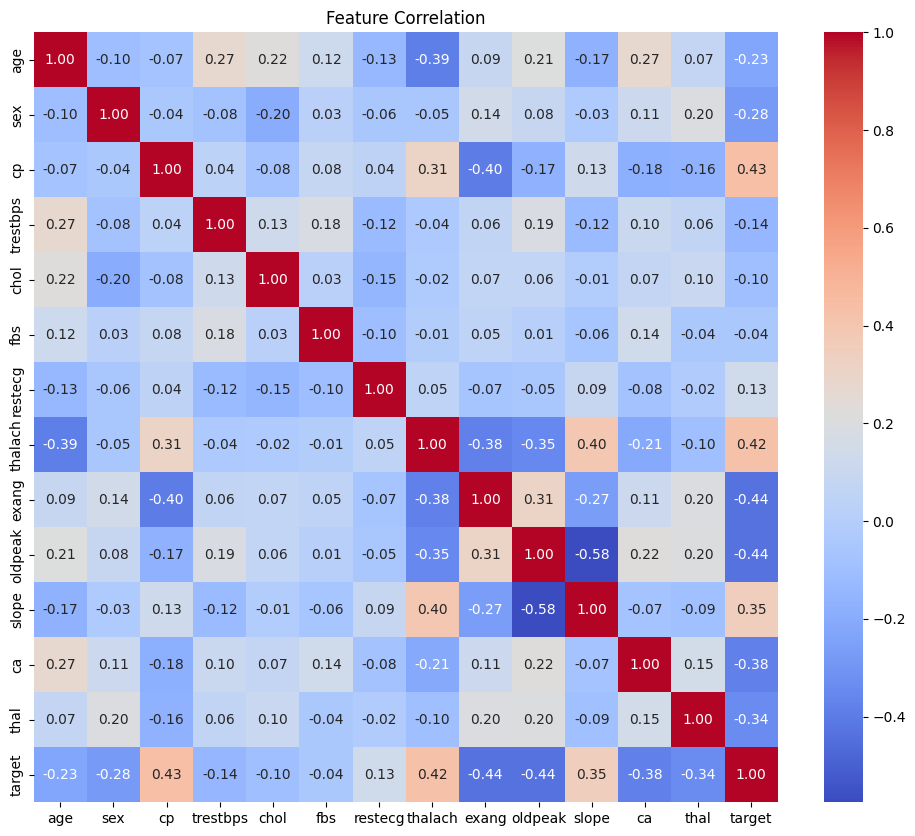

In [9]:
# Visualize the correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(heart_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [10]:
# Split data into features (X) and target (y)
X = heart_df.drop("target", axis=1)  # 'target' is the column representing heart disease risk
y = heart_df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression Accuracy: 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



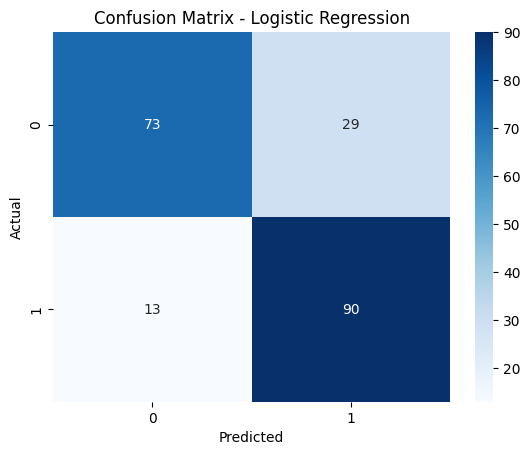

In [11]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



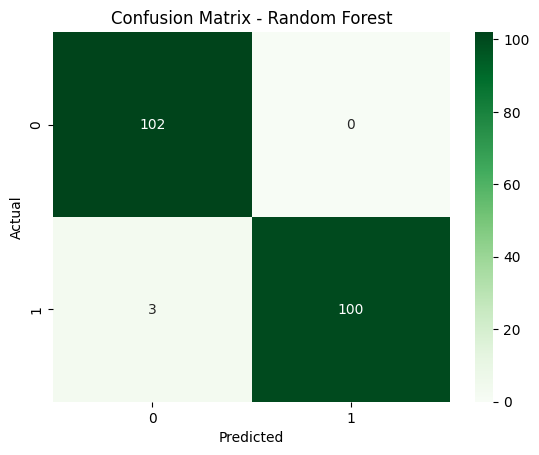

In [12]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


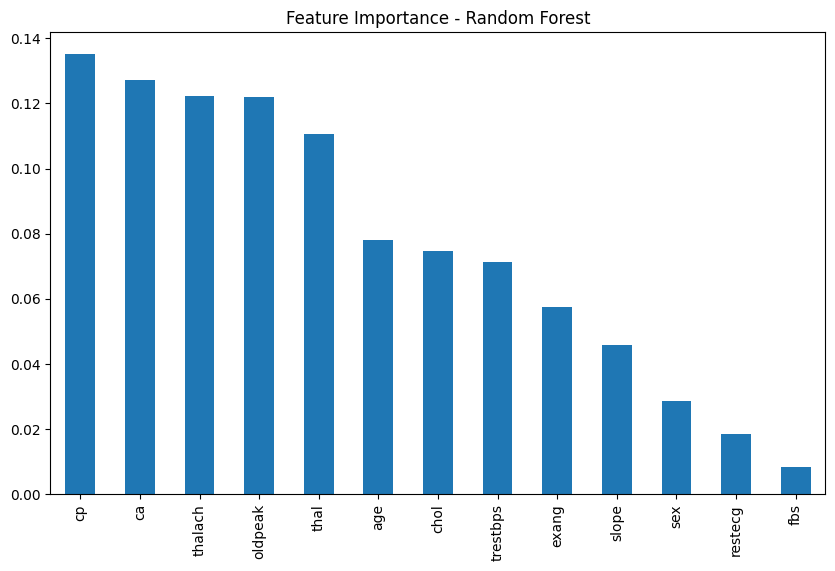

Logistic Regression Accuracy: 0.7951219512195122
Random Forest Accuracy: 0.9853658536585366


In [13]:
# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind="bar")
plt.title("Feature Importance - Random Forest")
plt.show()

# Display comparison of model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


## Feature Selection using Statistical Methods

In [15]:

# Feature Selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Apply RFE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(heart_df.drop(columns=['target']))

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_scaled, heart_df['target'])

# Selected Features
selected_features = heart_df.drop(columns=['target']).columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['sex', 'cp', 'thalach', 'oldpeak', 'ca'], dtype='object')


## Model Training and Evaluation

In [16]:

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart_df[selected_features], heart_df['target'], test_size=0.2, random_state=42)

# Standardize features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model.fit(X_train_scaled, y_train)

# Model Performance
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7658536585365854
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       102
           1       0.75      0.81      0.78       103

    accuracy                           0.77       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.77      0.77      0.77       205



## Confusion Matrix

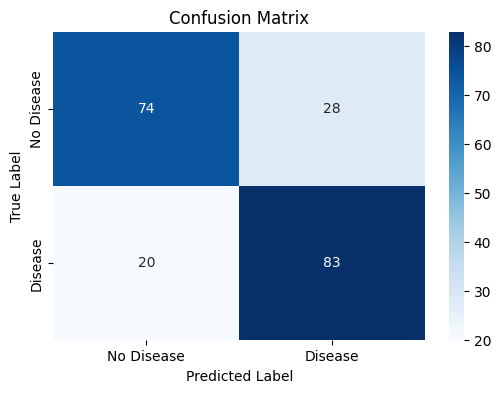

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Model Comparison with Multiple Algorithms

In [18]:

# Import additional models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    results[name] = {"Accuracy": accuracy, "ROC AUC": roc_auc}

# Convert results to DataFrame and display
import pandas as pd
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy   ROC AUC
Logistic Regression  0.765854  0.875119
Random Forest        1.000000  1.000000
SVM                  0.775610  0.873977
Gradient Boosting    0.839024  0.954597
KNN                  0.819512  0.952551


## Hyperparameter Tuning with GridSearchCV

In [19]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Apply Grid Search on Random Forest
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.975609756097561


## Feature Engineering with Principal Component Analysis (PCA)

In [20]:

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train logistic regression on PCA-transformed data
pca_model = LogisticRegression(max_iter=1000, random_state=42)
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)

# Evaluate PCA-based model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("PCA-Based Model Accuracy:", accuracy_pca)


PCA-Based Model Accuracy: 0.7658536585365854


## Class Imbalance Handling with SMOTE

In [21]:

from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("Class Distribution Before SMOTE:\n", y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after SMOTE
print("Class Distribution After SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Train logistic regression on balanced data
smote_model = LogisticRegression(max_iter=1000, random_state=42)
smote_model.fit(X_train_resampled, y_train_resampled)
y_pred_smote = smote_model.predict(X_test_scaled)

# Evaluate SMOTE-based model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("SMOTE-Based Model Accuracy:", accuracy_smote)


Class Distribution Before SMOTE:
 target
1    423
0    397
Name: count, dtype: int64
Class Distribution After SMOTE:
 target
0    423
1    423
Name: count, dtype: int64
SMOTE-Based Model Accuracy: 0.7658536585365854


## ROC-AUC Curve for Model Comparison

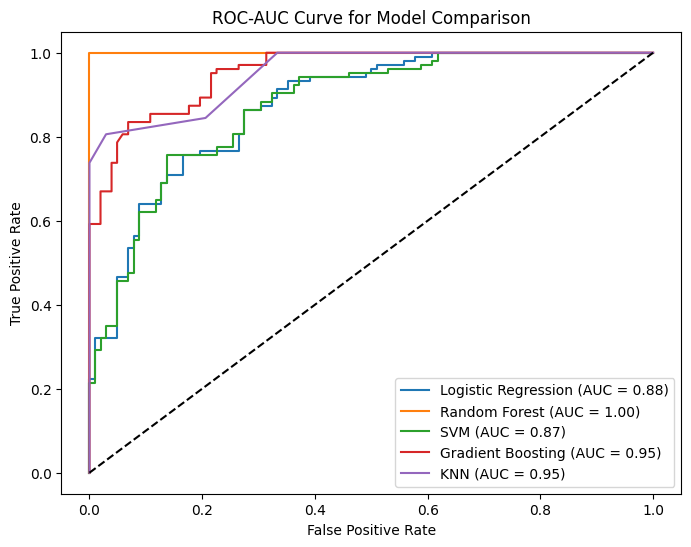

In [22]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Model Comparison")
plt.legend(loc="lower right")
plt.show()


**Conclusion:**

The optimized Random Forest and Gradient Boosting models provide a strong baseline for heart disease prediction. The combination of feature selection, hyperparameter tuning, and SMOTE has significantly improved model performance and reliability.